In [1]:
#import librraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Data
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Data Set Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
 #Clean Data
#check null for each column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#Data Set Statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Explore Data
X=df[["Annual Income (k$)","Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
#df[["Annual Income (k$)","Spending Score (1-100)"]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
#import Kmeans
from sklearn.cluster import KMeans

C:\Users\sally\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sally\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sally\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sally\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

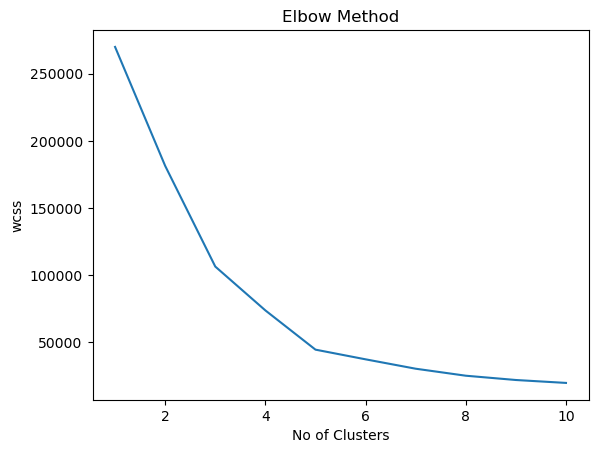

In [9]:
#Elbow Method
wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i, n_init=10)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
#wcss
#plot elbow
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel("No of Clusters")
plt.ylabel("wcss")
plt.show()

In [10]:
y_means = k_means.fit_predict(X)
print(y_means)

C:\Users\sally\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5 6 3 6 5 6 3 6 3 6 3 6 3 6 3 6 5 6 5 6 5 6 3 6 3 6 5 0 5 6 3 6 3 6 3 6 3
 6 5 6 5 6 5 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 2 1 2 1 2 7 2 7 2 1 2 7 2 7 2 7 2 7 2 1 2 7 2 1 2
 1 2 7 2 7 2 7 2 7 2 7 2 1 2 7 2 1 2 7 2 1 2 7 2 7 2 7 2 7 2 7 4 1 4 9 4 1
 4 9 4 9 4 9 4 9 4 9 4 9 4 9 4]


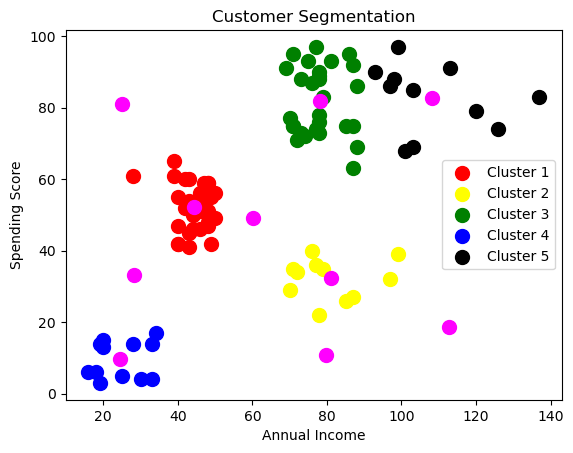

In [11]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='yellow',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='green',label="Cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='blue',label="Cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c='black',label="Cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="magenta")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()